Grupo formado por los estudiantes:


*   Gian Karlo Lanzino Baracaldo
*   Juan David Palacios Feo
*   Maria Camila Sanchez Paez



## **Lectura de datos y tratamiento**

In [64]:
library(tidyverse)

In [65]:
data <- read_csv("https://raw.githubusercontent.com/masanchezpa/Lenguajes-de-programacion-2024-2/refs/heads/main/Ants%20Evaporation%20rate%20experiment-table.csv", skip = 6)
head(data)

Rows: 1716 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): [run number], evaporation-rate, population, diffusion-rate, [step],...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[run number],evaporation-rate,population,diffusion-rate,[step],ticks,ticks_blue,ticks_sky,ticks_cyan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,125,50,1110,1110,1110,826,531
11,0,125,50,1148,1148,1148,738,429
4,0,125,50,986,986,986,771,244
12,0,125,50,1194,1194,1194,768,321
7,0,125,50,1088,1088,1088,704,493
2,0,125,50,1179,1179,1179,568,754


In [66]:
colnames(data) <- c('runs','evaporationRate','population', 'difussionRate','steps' ,'depletionTime', 'Resource 1', 'Resource 2', 'Resource 3')
head(data)

runs,evaporationRate,population,difussionRate,steps,depletionTime,Resource 1,Resource 2,Resource 3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,125,50,1110,1110,1110,826,531
11,0,125,50,1148,1148,1148,738,429
4,0,125,50,986,986,986,771,244
12,0,125,50,1194,1194,1194,768,321
7,0,125,50,1088,1088,1088,704,493
2,0,125,50,1179,1179,1179,568,754


In [67]:
data %>% select(evaporationRate,depletionTime) -> datas
head(datas)

evaporationRate,depletionTime
<dbl>,<dbl>
0,1110
0,1148
0,986
0,1194
0,1088
0,1179


In [68]:
datas %>% group_by(evaporationRate) %>% summarise(ptime= mean(depletionTime)) -> datag
datag

evaporationRate,ptime
<dbl>,<dbl>
0,1206.440
5,799.230
10,985.570
15,2511.570
20,2864.900
25,2761.020
30,2545.670
35,2405.060
40,2224.090


## **Calculo relación entre los recursos y la tasa de evaporación**

Análisis de los datos de tiempo de agotamiento de recursos en función de la tasa de evaporación. Primero, transforma los datos a un formato largo con `pivot_longer()` para que las columnas de recursos se conviertan en una columna llamada "Resource" y sus valores en "Depletion_Time". Luego, se calcula el tiempo de agotamiento promedio por tasa de evaporación y recurso con `group_by()` y `summarise()`. Finalmente, moramos cada recurso individualmente, calculando su tiempo promedio de agotamiento, la desviación estándar de este tiempo, y la correlación entre la tasa de evaporación y el tiempo de agotamiento. Finalmente, se imprime el resultado de este análisis.



In [69]:
data_long <- data %>%
  pivot_longer(
    cols = starts_with("Resource"),
    names_to = "Resource",
    values_to = "Depletion_Time"
  )

data_summary <- data_long %>%
  group_by(evaporationRate, Resource) %>%
  summarise(Average_Depletion_Time = mean(Depletion_Time), .groups = "drop")

resource_analysis <- data_long %>%
  group_by(Resource) %>%
  summarise(
    Average_Depletion_Time = mean(Depletion_Time),
    Depletion_Time_SD = sd(Depletion_Time),
    Correlation_with_Evaporation = cor(evaporationRate, Depletion_Time)
  )

print(resource_analysis)

# A tibble: 3 × 4
  Resource   Average_Depletion_Time Depletion_Time_SD Correlation_with_Evapora…¹
  <chr>                       <dbl>             <dbl>                      <dbl>
1 Resource 1                  1900.              643.                    -0.0329
2 Resource 2                  1011.              343.                     0.385 
3 Resource 3                   519.              228.                     0.807 
# ℹ abbreviated name: ¹​Correlation_with_Evaporation


## **Gráfica**

Generamos un gráfico de líneas usando `ggplot2` para visualizar la relación entre la tasa de evaporación y el tiempo de agotamiento promedio de los recursos. La gráfica incluye líneas de tendencia ajustadas con un modelo polinómico de segundo grado para cada recurso, mostrando cómo varía el tiempo de agotamiento a medida que cambia la tasa de evaporación.


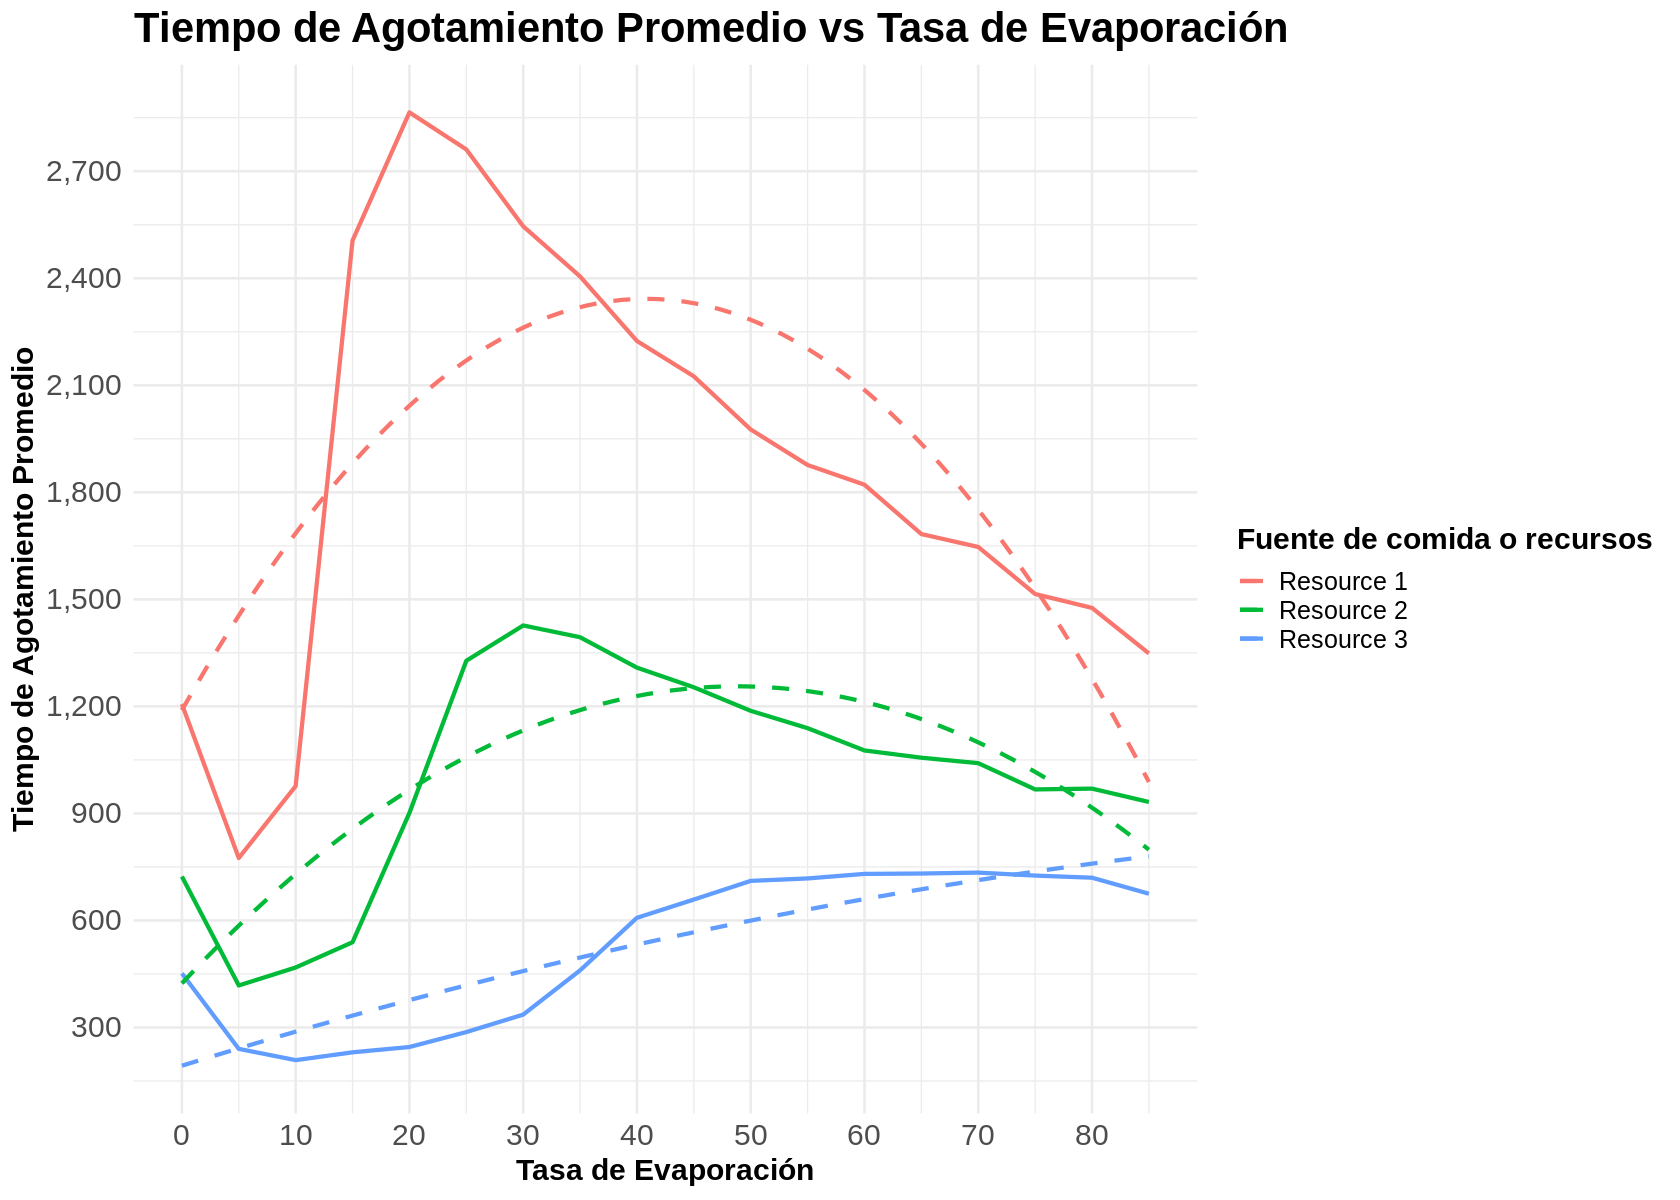

In [70]:
plot <- ggplot(data_summary, aes(x = evaporationRate, y = Average_Depletion_Time, color = Resource)) +
  geom_line(size = 1.2) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, linetype = "dashed", size = 1.2) +
  labs(
    title = "Tiempo de Agotamiento Promedio vs Tasa de Evaporación",
    x = "Tasa de Evaporación",
    y = "Tiempo de Agotamiento Promedio",
    color = "Fuente de comida o recursos"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 25, face = "bold"),
    axis.title = element_text(size = 18, face = "bold"),
    axis.text = element_text(size = 18),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 15)
  ) +
  scale_x_continuous(
    breaks = seq(
      from = floor(min(data_summary$evaporationRate)),
      to = ceiling(max(data_summary$evaporationRate)),
      by = 10  # Adjust this step size as needed
    )
  ) +
  scale_y_continuous(
    breaks = seq(300, 3300, by = 300),
    labels = scales::comma
  )

options(repr.plot.width = 14, repr.plot.height = 10)

print(plot)


## **Analisis**

### **Por recursos**

1. **Resource 1**:
   - **Tiempo promedio de agotamiento**: Es el más alto (**1900 unidades**), lo que indica que este recurso, al estar más lejos del nido, es menos accesible.
   - **Correlación negativa moderada con la tasa de evaporación** (**-0.0329**): A medida que aumenta la evaporación de las feromonas, las hormigas tienen mayor dificultad para rastrear este recurso lejano, lo que reduce su tasa de agotamiento.

2. **Resource 2**:
   - **Tiempo promedio de agotamiento**: Es intermedio (**1011 unidades**), pues este recruso se encuentra a una distancia moderada del nido, siendo más accesible que **Resource 1** pero menos que **Resource 3**.
   - **Correlación débilmente positiva con la tasa de evaporación** (**0.385**): Un aumento en la evaporación no afecta significativamente la accesibilidad de este recurso debido a su ubicación.

3. **Resource 3**:
   - **Tiempo promedio de agotamiento**: Es el más bajo (**519 unidades**), lo que indica que es el recurso más accesible, debido a su proximidad al nido.
   - **Correlación positiva fuerte con la tasa de evaporación** (**0.807**): Esto sugiere que cuando las feromonas se evaporan más rápido, las hormigas priorizan recursos cercanos como **Resource 3**.

---

### **Conclusiones**

El **rate de evaporación de feromonas** afecta directamente la capacidad de las hormigas para rastrear recursos. Cuando la evaporación es alta:
- **Recursos más lejanos como Resource 1** son más difíciles de alcanzar, reduciendo su agotamiento.
- **Recursos cercanos como Resource 3** son más accesibles, lo que provoca un agotamiento más rápido.
- **Resource 2**, al estar a una distancia intermedia, no muestra un impacto significativo de la evaporación.

---

